<IPython.core.display.Javascript object>


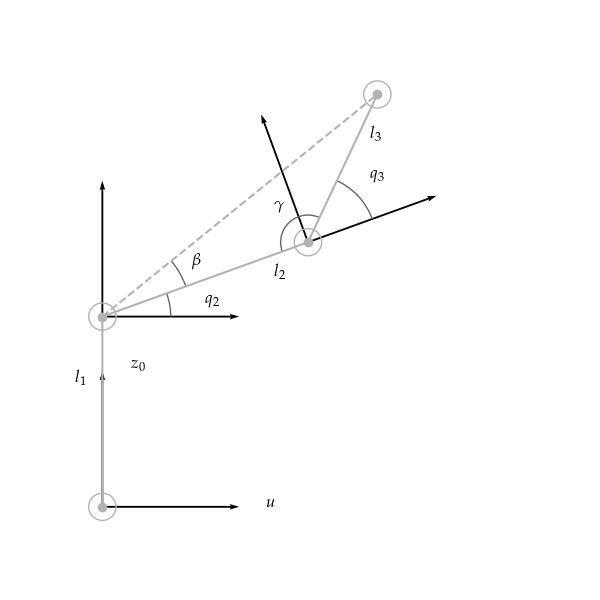

In [1]:
%matplotlib notebook
from matplotlib.pyplot import figure
from matplotlib import rc
from matplotlib.patches import Arc, Circle

from numpy import sin, cos, pi, matrix, array, eye, degrees, arctan2

def rot_z(θ):
    from numpy import sin, cos, matrix
    A = matrix([[cos(θ), -sin(θ), 0, 0],
                [sin(θ), cos(θ), 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def tras_x(x):
    from numpy import matrix
    A = matrix([[1, 0, 0, x],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def ejes(axis, origen, orientacion, long=0.5):
    
    i = orientacion[:3, :1].T.tolist()[0]
    j = orientacion[:3, 1:2].T.tolist()[0]
    k = orientacion[:3, 2:3].T.tolist()[0]    
    
    xs, ys, zs = origen.T.tolist()[0]
    us, vs, ws = zip(i)
    axis.quiver(xs, ys, us, vs, scale=2, scale_units="xy", angles="xy", color="k", width=0.004)

    us, vs, ws = zip(j)
    axis.quiver(xs, ys, us, vs, scale=2, scale_units="xy", angles="xy", color="k", width=0.004)

τ = 2*pi
δ = 0.1
l1, l2, l3 = 0.7, 0.8, 0.6
q1, q2, q3 = τ/4, -τ/4 + τ/18, τ/8

A1 = rot_z(q1)*tras_x(l1)
A2 = rot_z(q2)*tras_x(l2)
A3 = rot_z(q3)*tras_x(l3)

H1 = A1
H2 = A1*A2
H3 = A1*A2*A3

R1, R2, R3 = H1[:3, :3], H2[:3, :3], H3[:3, :3]
o1, o2, o3 = H1[:3, 3:], H2[:3, 3:], H3[:3, 3:]
x1, x2, x3 = H1[:3, :1], H2[:3, :1], H3[:3, :1]
y1, y2, y3 = H1[:3, 1:2], H2[:3, 1:2], H3[:3, 1:2]

o0 = matrix([[0, 0, 0]]).T
R0 = eye(3)

xs = [o0.item(0), o1.item(0), o2.item(0), o3.item(0)]
ys = [o0.item(1), o1.item(1), o2.item(1), o3.item(1)]

θ = arctan2(o3.item(1) - o1.item(1), o3.item(0) - o1.item(0))
γ = τ/2 - q3

p_l1 = o0 + (l1/2)*x1
p_l2 = o1 + (l2/2)*x2
p_l3 = o2 + (l3/2)*x3

p_q1 = o0 + (l1/2)*x1
p_q2 = o1 + (l2/2)*x2
p_q3 = o2 + (l3/2)*x3

#xa, ya = [1,0], [0,1]
#xb, yb = (rot*matrix([xa]).T).T.tolist()[0], (rot*matrix([ya]).T).T.tolist()[0]

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino'], 'size':14.0})
#rc('font', **{'family':'cursive', 'cursive':['Zapf Chancery'], 'size':14.0})
#rc('font', **{'family':'fantasy', 'fantasy':['Humor Sans'], 'size':14.0})
rc('text', usetex=True)

tam=(6, 6)
tls=True

fig = figure(figsize=tam)
ax = fig.gca()

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["top"].set_color("none")
ax.axes.spines["bottom"].set_color("none")
ax.axes.spines["left"].set_color("none")
ax.axes.spines["right"].set_color("none")

ax.axes.set_xlim(-δ, 1.5 + δ)
ax.axes.set_ylim(-δ, 1.5 + δ)

eje0 = Circle([o0.item(0), o0.item(1)], 0.05, ec='333')
eje0.set_fill(False)
ax.add_patch(eje0)

eje1 = Circle([o1.item(0), o1.item(1)], 0.05, ec='333')
eje1.set_fill(False)
ax.add_patch(eje1)

eje2 = Circle([o2.item(0), o2.item(1)], 0.05, ec='333')
eje2.set_fill(False)
ax.add_patch(eje2)

eje3 = Circle([o3.item(0), o3.item(1)], 0.05, ec='333')
eje3.set_fill(False)
ax.add_patch(eje3)

#acot1 = Arc([o0.item(0), o0.item(1)], 0.5, 0.5, 0, 0, degrees(q1), color="666")
#ax.add_patch(acot1)

acot1 = Arc([o1.item(0), o1.item(1)], 0.5, 0.5, 0, degrees(0), degrees(q1 + q2), color="666")
ax.add_patch(acot1)

acot1 = Arc([o1.item(0), o1.item(1)], 0.65, 0.65, 0, degrees(q1 + q2), degrees(θ), color="666")
ax.add_patch(acot1)

acot1 = Arc([o2.item(0), o2.item(1)], 0.5, 0.5, 0, degrees(q1 + q2), degrees(q1 + q2 + q3), color="666")
ax.add_patch(acot1)

acot1 = Arc([o2.item(0), o2.item(1)], 0.2, 0.2, 0, degrees(q1 + q2 + q3), degrees(q1 + q2 + q3 + γ), color="666")
ax.add_patch(acot1)

ax.plot(xs, ys, "-o", color="333")
ax.plot([o1.item(0), o3.item(0)],[o1.item(1), o3.item(1)], "--", color="333")

ejes(ax, o0, R0)
ejes(ax, o1, R0)
ejes(ax, o2, R2)
#ejes(ax, o3, R3)

#ax.quiver([0], [0], [xa[0]], [xa[1]], scale=1, scale_units="xy", angles="xy", color="k")
#ax.quiver([0], [0], [ya[0]], [ya[1]], scale=1, scale_units="xy", angles="xy", color="k")
#ax.quiver([0], [0], [xb[0]], [xb[1]], scale=1, scale_units="xy", angles="xy", color="k")
#ax.quiver([0], [0], [yb[0]], [yb[1]], scale=1, scale_units="xy", angles="xy", color="k")
#ax.quiver([0], [0],  [P[0]],  [P[1]], scale=1, scale_units="xy", angles="xy", color="r", width=0.004)

ax.text(xs[0] + δ + 0.5, ys[0], r'$u$', size=12)        
ax.text(xs[0] + δ, ys[0] + 0.5, r'$z_0$', size=12)

#ax.text(xs[1] + (δ + 0.5)*x1.item(0), ys[1] + (δ + 0.5)*x1.item(1), r'$x_1$', size=12)        
#ax.text(xs[1] + (δ + 0.5)*y1.item(0), ys[1] + (δ + 0.5)*y1.item(1), r'$y_1$', size=12)

#ax.text(xs[2] + (δ + 0.5)*x2.item(0), ys[2] + (δ + 0.5)*x2.item(1), r'$x_2$', size=12)        
#ax.text(xs[2] + (δ + 0.4)*y2.item(0), ys[2] + (δ + 0.5)*y2.item(1), r'$y_2$', size=12)

#ax.text(xs[3] + (δ + 0.5)*x3.item(0), ys[3] + (δ + 0.5)*x3.item(1), r'$x_3$', size=12)        
#ax.text(xs[3] + (δ + 0.6)*y3.item(0), ys[3] + (δ + 0.5)*y3.item(1), r'$y_3$', size=12)

ax.text(p_l1.item(0) - δ,     p_l1.item(1) + δ, r'$l_1$', size=12)
ax.text(p_l2.item(0) + 2.5*δ,     p_l2.item(1) , r'$l_2$', size=12)
ax.text(p_l3.item(0) + δ, p_l3.item(1) + δ  , r'$l_3$', size=12)

#ax.text(p_l1.item(0) - δ, p_l1.item(1) - 1.25*δ, r'$q_1$', size=12)
ax.text(p_l2.item(0) + 0*δ, p_l2.item(1) - 1*δ, r'$q_2$', size=12)
ax.text(p_l3.item(0) + δ, p_l3.item(1) - 0.5*δ, r'$q_3$', size=12)
ax.text(p_l2.item(0) - 0.5*δ, p_l2.item(1) + 0.5*δ, r'$\beta$', size=12)
ax.text(p_l3.item(0) - 2.5*δ, p_l3.item(1) - 1.5*δ, r'$\gamma$', size=12)

fig.savefig('altura.png', transparent=True)